In [1]:
# Import csv datasets from data folder in to pandas dataframes: <countryname>_covid_mortality.csv   

In [2]:
import pandas as pd
from pandas.tests.frame.test_validate import dataframe

from project.etl_pipeline import colombia_df

# Define the path and country names
path = "../data"
countries = ["chile", "colombia", "usa"]

# Load datasets into pandas DataFrames
dataframes = {country: pd.read_csv(f"{path}/{country}_covid_mortality.csv") for country in countries}

# Example: Access the DataFrame for Chile
chile_df = dataframes["chile"]
colombia_df = dataframes["colombia"]
usa_df = dataframes["usa"]
world_pop_df = pd.read_csv(f"{path}/world_population_total.csv")


2025-01-10 11:31:27,647 - INFO - Attempting to fetch data from https://datos.gob.cl/dataset/8982a05a-91f7-422d-97bc-3eee08fde784/resource/8e5539b7-10b2-409b-ae5a-36dae4faf817/download/defunciones_covid19_2020_2024.csv
2025-01-10 11:31:34,242 - INFO - Successfully fetched data from https://datos.gob.cl/dataset/8982a05a-91f7-422d-97bc-3eee08fde784/resource/8e5539b7-10b2-409b-ae5a-36dae4faf817/download/defunciones_covid19_2020_2024.csv
2025-01-10 11:31:34,253 - INFO - Attempting to load data into DataFrame
2025-01-10 11:31:34,417 - INFO - Successfully loaded data into DataFrame with 58438 rows
2025-01-10 11:31:34,418 - INFO - Attempting to drop non-whitelisted columns
2025-01-10 11:31:34,423 - INFO - Successfully dropped columns. Remaining columns: ['FECHA_DEF', 'DIAG1']
2025-01-10 11:31:34,426 - INFO - Transforming column 'FECHA_DEF' to datetime
2025-01-10 11:31:34,449 - INFO - Successfully transformed column 'FECHA_DEF' to datetime
2025-01-10 11:31:34,455 - INFO - Column 'FECHA_DEF' has

### USA

In [3]:
usa_df["group"].unique()

array(['Age', 'All', 'Sex', 'Race', 'Race and Age', 'Age and Race'],
      dtype=object)

In [4]:
usa_df

,data_period_start,data_period_end,group,subgroup1,covid_deaths,crude_rate
0,2020-01-01,2020-01-31,Age,0-4 years,0.0,0.00
1,2020-02-01,2020-02-29,Age,0-4 years,0.0,0.00
2,2020-03-01,2020-03-31,Age,0-4 years,4.0,0.02
3,2020-04-01,2020-04-30,Age,0-4 years,5.0,0.03
4,2020-05-01,2020-05-31,Age,0-4 years,7.0,0.04
...,...,...,...,...,...,...
5293,2024-06-01,2024-06-30,Age and Race,75+ years,970.0,5.69
5294,2024-07-01,2024-07-31,Age and Race,75+ years,1736.0,10.19
5295,2024-08-01,2024-08-31,Age and Race,75+ years,3053.0,17.92
5296,2024-09-01,2024-09-30,Age and Race,75+ years,2923.0,17.16


In [5]:
# Function to get total covid deaths for a given group 
def total_covid_deaths_by_col(df, col, group_column): 
    #return df.groupby(group_column)['covid_deaths'].sum()
    return df[df[col] == group_column]['covid_deaths'].sum()

In [6]:
groups = ["Age", "Race", "Sex", "All"]

for group in groups:
    print(f"{group}: {total_covid_deaths_by_col(usa_df, col="group", group_column=group)}")

Age: 1210497.0
Race: 1202568.0
Sex: 1210511.0
All: 1210511.0


In [7]:
df_race = usa_df[usa_df['group'] == "Race"]
subgroups = df_race["subgroup1"].unique()

sum = 0
for subgroup in subgroups:
    tmp = total_covid_deaths_by_col(df_race, "subgroup1", subgroup)
    print(f"{subgroup}: {tmp}")
    sum+=tmp
    
print("Total: " + str(sum))

Hispanic: 175438.0
Non-Hispanic American Indian or Alaska Native: 12492.0
Non-Hispanic Asian: 37849.0
Non-Hispanic Black: 162968.0
Non-Hispanic Native Hawaiian or Other Pacific Islander: 2375.0
Non-Hispanic White: 811446.0
Total: 1202568.0


In [8]:
## Further look at notebook for some plotting for data report

### Colombia

In [9]:
colombia_df.head()

,Recuperado,Fecha de muerte
0,Fallecido,2020-12-30
1,Fallecido,2020-12-26
2,Fallecido,2020-11-11
3,Fallecido,2020-11-12
4,Fallecido,2020-11-16


In [10]:
colombia_df["Recuperado"].unique()

array(['Fallecido', 'fallecido'], dtype=object)

In [11]:
total_deaths = colombia_df.shape[0]
print(f"Total deaths: {total_deaths:,}")

Total deaths: 143,125


### Chile

In [12]:
chile_df.head()

,FECHA_DEF,DIAG1
0,2020-12-31,U071
1,2020-03-20,U071
2,2020-03-21,U071
3,2020-03-25,U071
4,2020-03-26,U071


In [13]:
chile_df["DIAG1"].unique()

# print the count of all unique values in the DIAG1 column
for value in chile_df["DIAG1"].unique():
    print(f"{value}: {chile_df[chile_df['DIAG1'] == value].shape[0]}")

U071: 53448
U072: 4647
U099: 244


In [14]:
total_deaths = chile_df.shape[0]
print(f"Total deaths: {total_deaths:,}")

Total deaths: 58,339


In [15]:
world_pop_df.head()

,Country Name,2020,2021,2022,2023
0,Chile,19300315.0,19493184.0,19603733.0,19629590.0
1,Colombia,50930662.0,51516562.0,51874024.0,52085168.0
2,Mexico,125998302.0,126705138.0,127504125.0,128455567.0
3,United States,331526933.0,332048977.0,333271411.0,334914895.0


## Question 1:
Absolute values

In [74]:
import matplotlib.pyplot as plt

def plot_covid_mortality(countries, mortality_values, title="COVID Mortalities by Country", is_relative=False):
    """
    Plots a histogram of COVID mortalities for given countries.

    Parameters:
    - countries: List of country names.
    - mortality_values: List of mortality values corresponding to each country.
    """
    plt.figure(figsize=(8, 6))
    plt.bar(countries, mortality_values, color='skyblue')
    plt.xlabel('Country')
    
    if is_relative:
        plt.ylabel('COVID-19 Mortalities per 100k')
    else:
        plt.ylabel('COVID-19 Mortalities')
    #plt.title(title)
    
    plt.savefig("figures/"+ title + ".png")
    plt.show()

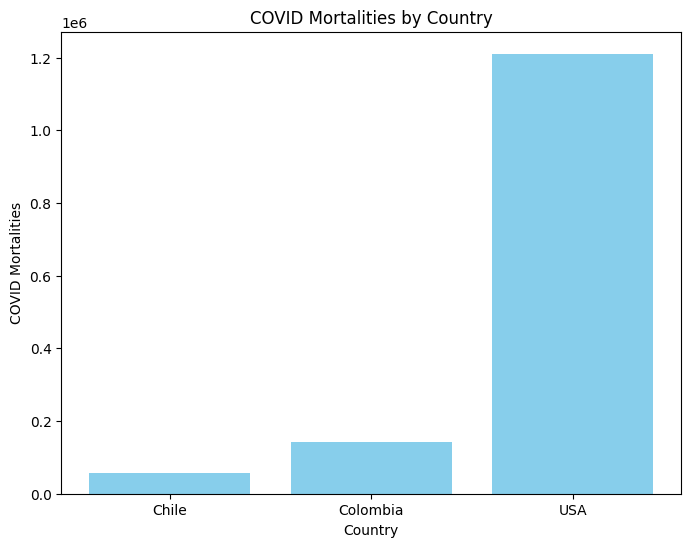

In [17]:
countries = ["Chile", "Colombia", "USA"]
mortality_values = [chile_df.shape[0], colombia_df.shape[0], total_covid_deaths_by_col(usa_df, col="group", group_column="All")]
plot_covid_mortality(countries, mortality_values)

Relative Values

In [18]:
world_pop_df.head()

,Country Name,2020,2021,2022,2023
0,Chile,19300315.0,19493184.0,19603733.0,19629590.0
1,Colombia,50930662.0,51516562.0,51874024.0,52085168.0
2,Mexico,125998302.0,126705138.0,127504125.0,128455567.0
3,United States,331526933.0,332048977.0,333271411.0,334914895.0


In [19]:
##TODO: To be more accurate, I'd have to calculate the relative value for each year individually

In [20]:
total_population = [
    world_pop_df[world_pop_df["Country Name"] == "Chile"]["2023"].values[0], world_pop_df[world_pop_df["Country Name"] == "Colombia"]["2023"].values[0], world_pop_df[world_pop_df["Country Name"] == "United States"]["2023"].values[0]
]

In [21]:
relative_mortality_values = [mortality_values[i] / total_population[i] for i in range(len(countries))]
relative_mortality_values

[np.float64(0.002971992792513751),
 np.float64(0.002747903203460916),
 np.float64(0.0036143838869871704)]

In [22]:
relative_mortality_values_per_100k = [value * 100000 for value in relative_mortality_values]

In [23]:
relative_mortality_values_per_100k

[np.float64(297.1992792513751),
 np.float64(274.7903203460916),
 np.float64(361.43838869871706)]

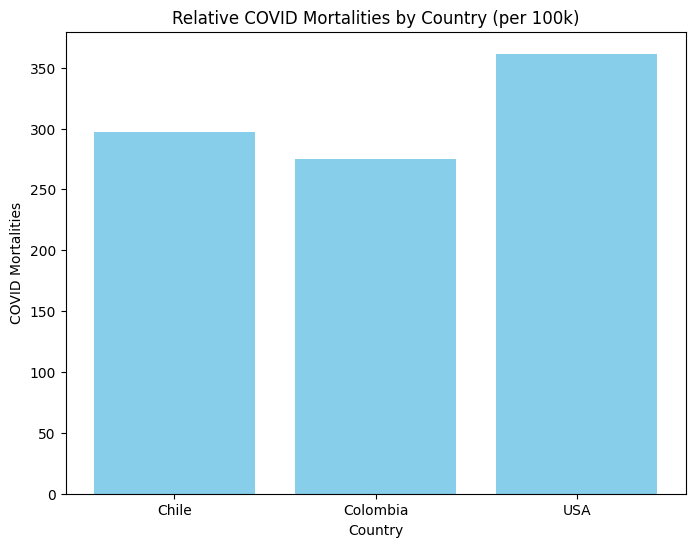

In [24]:
plot_covid_mortality(countries, relative_mortality_values_per_100k, "Relative COVID Mortalities by Country (per 100k)")

## Question 2:

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_covid_mortality_trend(time_frames, mortality_numbers, chart_type='line', title='COVID Mortalities Over Time'):
    """
    Plots a line chart or area chart of COVID mortalities over time.

    Parameters:
    - time_frames: List of time periods in "MM-YYYY" format.
    - mortality_numbers: List of mortality numbers corresponding to each time period.
    - chart_type: Type of chart to plot ('line' or 'area'). Default is 'line'.
    - title: Title of the chart. Default is 'COVID Mortalities Over Time'.
    """
    # Convert time_frames to datetime format
    time_frames = pd.to_datetime(time_frames, format='%m-%Y')
    
    plt.figure(figsize=(10, 6))
    if chart_type == 'line':
        plt.plot(time_frames, mortality_numbers, marker='o', color='blue', label='COVID Mortalities')
    elif chart_type == 'area':
        plt.fill_between(time_frames, mortality_numbers, color='skyblue', alpha=0.5, label='COVID Mortalities')
        plt.plot(time_frames, mortality_numbers, marker='o', color='blue')

    plt.xlabel('Time Period')
    plt.ylabel('COVID Mortalities')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig("figures/"+ title + ".png")
    plt.show()

In [26]:
colombia_df.head()

,Recuperado,Fecha de muerte
0,Fallecido,2020-12-30
1,Fallecido,2020-12-26
2,Fallecido,2020-11-11
3,Fallecido,2020-11-12
4,Fallecido,2020-11-16


In [27]:
import pandas as pd

def prepare_monthly_mortality_data(df, date_column='date'):
    """
    Processes a dataframe to create lists of monthly mortality sums and corresponding months.

    Parameters:
    - df: Pandas DataFrame containing the data.
    - date_column: Name of the column with the date of each death in 'YYYY-MM-DD' format. Default is 'date'.

    Returns:
    - time_frames: List of months in "MM-YYYY" format.
    - mortality_numbers: List of mortality sums for each corresponding month.
    """
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Group by year and month, then count the number of deaths
    monthly_mortality = df.groupby(df[date_column].dt.to_period("M")).size()
    
    # Convert PeriodIndex to string format "MM-YYYY" and prepare lists
    time_frames = monthly_mortality.index.strftime("%m-%Y").tolist()
    mortality_numbers = monthly_mortality.values.tolist()
    
    return time_frames, mortality_numbers

In [28]:
def prepare_monthly_relative_mortality_data(df, date_column='date', population_size=1):
    """
    Processes a dataframe to create lists of monthly mortality sums relative to the population size 
    and corresponding months.

    Parameters:
    - df: Pandas DataFrame containing the data.
    - date_column: Name of the column with the date of each death in 'YYYY-MM-DD' format. Default is 'date'.
    - population_size: The population size to calculate relative mortality. Default is 1.

    Returns:
    - time_frames: List of months in "MM-YYYY" format.
    - relative_mortality_numbers: List of mortality sums relative to the population for each corresponding month.
    """
    # Ensure the date column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])
    
    # Group by year and month, then count the number of deaths
    monthly_mortality = df.groupby(df[date_column].dt.to_period("M")).size()
    
    # Convert PeriodIndex to string format "MM-YYYY"
    time_frames = monthly_mortality.index.strftime("%m-%Y").tolist()
    
    # Calculate relative mortality numbers
    relative_mortality_numbers = (monthly_mortality / population_size).tolist()
    
    return time_frames, relative_mortality_numbers


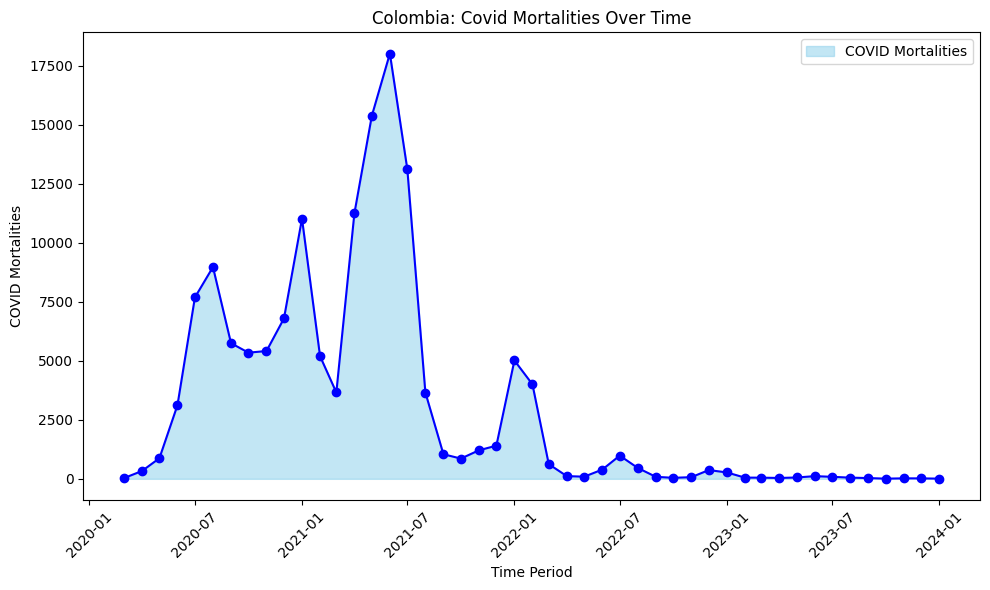

In [29]:
## Do for colombia
time_frames_colombia, mortality_numbers_colombio = prepare_monthly_mortality_data(colombia_df, date_column='Fecha de muerte')
sum = 0
for _ in range(len(time_frames_colombia)):
    #print(f"{time_frames_colombia[_]}: {mortality_numbers_colombio[_]}")
    sum += mortality_numbers_colombio[_]

assert sum == colombia_df.shape[0]
#print("Total: " + str(sum))
plot_covid_mortality_trend(time_frames_colombia, mortality_numbers_colombio, chart_type='area', title="Colombia: Covid Mortalities Over Time")


In [30]:
chile_df.head()

,FECHA_DEF,DIAG1
0,2020-12-31,U071
1,2020-03-20,U071
2,2020-03-21,U071
3,2020-03-25,U071
4,2020-03-26,U071


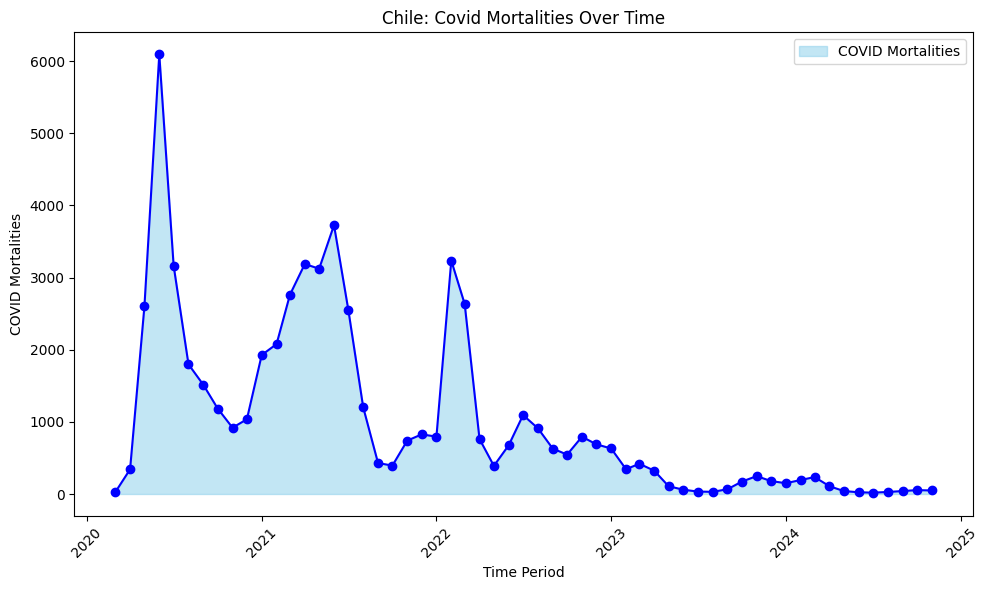

In [31]:
## Do for Chile
time_frames_chile, mortality_numbers_chile = prepare_monthly_mortality_data(chile_df, date_column='FECHA_DEF')
sum = 0
for _ in range(len(time_frames_chile)):
    #print(f"{time_frames_chile[_]}: {mortality_numbers_chile[_]}")
    sum += mortality_numbers_chile[_]

assert sum == chile_df.shape[0]
#print("Total: " + str(sum))
plot_covid_mortality_trend(time_frames_chile, mortality_numbers_chile, chart_type='area', title="Chile: Covid Mortalities Over Time")

In [32]:
## Do for USA

In [33]:
import pandas as pd

def prepare_monthly_mortality_from_period_usa(df, start_col='data_period_start', mortality_col='covid_deaths', group_col='group', group_column='All'):
    """
    Prepares two lists for plotting: one with the time periods and another with the summed mortality numbers.
    Handles filtering by group, including the "All" group which sums across all groups.
    
    Parameters:
    - df: DataFrame with columns for the start date, death counts, and group information.
    - start_col: Column name for the start date of the period. Default is 'data_period_start'.
    - mortality_col: Column name for the number of deaths. Default is 'covid_deaths'.
    - group_col: Column name for the grouping column. Default is 'group'.
    - group_column: The specific group to filter by. Default is 'All' for total deaths across all groups.
    
    Returns:
    - time_frames: List of time periods in "MM-YYYY" format.
    - mortality_numbers: List of summed mortality values for each period.
    """
    # Ensure the date is in datetime format
    df[start_col] = pd.to_datetime(df[start_col])

    df_filtered = df[df[group_col] == group_column]
    
    # Group by the start date of each period (monthly) and sum the deaths
    df_grouped = df_filtered.groupby(df_filtered[start_col].dt.to_period('M'))[mortality_col].sum()
    
    # Prepare lists of time periods and summed mortality numbers
    time_frames = df_grouped.index.strftime('%m-%Y').tolist()
    mortality_numbers = df_grouped.values.tolist()
    
    return time_frames, mortality_numbers


In [34]:
def prepare_monthly_mortality_from_period_usa_with_subgroup(df, start_col='data_period_start', mortality_col='covid_deaths', group_col='group', group_column='All', subgroup_col='subgroup1', subgroup_column="Hispanic"):
    """
    Prepares two lists for plotting: one with the time periods and another with the summed mortality numbers.
    Handles filtering by group and subgroup, including the "All" group which sums across all groups.
    
    Parameters:
    - df: DataFrame with columns for the start date, death counts, and group information.
    - start_col: Column name for the start date of the period. Default is 'data_period_start'.
    - mortality_col: Column name for the number of deaths. Default is 'covid_deaths'.
    - group_col: Column name for the grouping column. Default is 'group'.
    - group_column: The specific group to filter by. Default is 'All' for total deaths across all groups.
    - subgroup_col: Column name for the sub-grouping column. Default is 'subgroup1'.
    - subgroup_column: The specific subgroup to filter by. Default is None to include all subgroups.
    
    Returns:
    - time_frames: List of time periods in "MM-YYYY" format.
    - mortality_numbers: List of summed mortality values for each period.
    """
    # Ensure the date is in datetime format
    df[start_col] = pd.to_datetime(df[start_col])

    # Filter by the specified group
    df_filtered = df[df[group_col] == group_column]
    
    # Filter by the specified subgroup if provided
    if subgroup_column is not None:
        df_filtered = df_filtered[df_filtered[subgroup_col] == subgroup_column]
    
    # Group by the start date of each period (monthly) and sum the deaths
    df_grouped = df_filtered.groupby(df_filtered[start_col].dt.to_period('M'))[mortality_col].sum()
    
    # Prepare lists of time periods and summed mortality numbers
    time_frames = df_grouped.index.strftime('%m-%Y').tolist()
    mortality_numbers = df_grouped.values.tolist()
    
    return time_frames, mortality_numbers


In [35]:
import pandas as pd

def prepare_monthly_relative_mortality_from_period_usa(df, start_col='data_period_start', mortality_col='covid_deaths', group_col='group', group_column='All', population_size=1):
    """
    Prepares two lists for plotting: one with the time periods and another with the summed relative mortality numbers.
    Handles filtering by group, including the "All" group which sums across all groups.
    
    Parameters:
    - df: DataFrame with columns for the start date, death counts, and group information.
    - start_col: Column name for the start date of the period. Default is 'data_period_start'.
    - mortality_col: Column name for the number of deaths. Default is 'covid_deaths'.
    - group_col: Column name for the grouping column. Default is 'group'.
    - group_column: The specific group to filter by. Default is 'All' for total deaths across all groups.
    - population_size: The population size to calculate relative mortality. Default is 1.
    
    Returns:
    - time_frames: List of time periods in "MM-YYYY" format.
    - relative_mortality_numbers: List of summed relative mortality values for each period.
    """
    # Ensure the date is in datetime format
    df[start_col] = pd.to_datetime(df[start_col])

    # Filter by the specified group
    df_filtered = df[df[group_col] == group_column]
    
    # Group by the start date of each period (monthly) and sum the deaths
    df_grouped = df_filtered.groupby(df_filtered[start_col].dt.to_period('M'))[mortality_col].sum()
    
    # Prepare lists of time periods and summed relative mortality numbers
    time_frames = df_grouped.index.strftime('%m-%Y').tolist()
    relative_mortality_numbers = (df_grouped / population_size).tolist()
    
    return time_frames, relative_mortality_numbers


In [36]:
time_frames_usa, mortality_numbers_usa = prepare_monthly_mortality_from_period_usa(usa_df)
sum = 0
for _ in range(len(time_frames_chile)):
    #print(f"{time_frames_usa[_]}: {mortality_numbers_usa[_]}")
    sum += mortality_numbers_usa[_]
print("Total: " + str(sum))
assert sum == total_covid_deaths_by_col(usa_df, col="group", group_column="All")
## TODO why doesnt this assertion hold?

Total: 1207506.0


AssertionError: 

In [37]:
## TODO fix scale

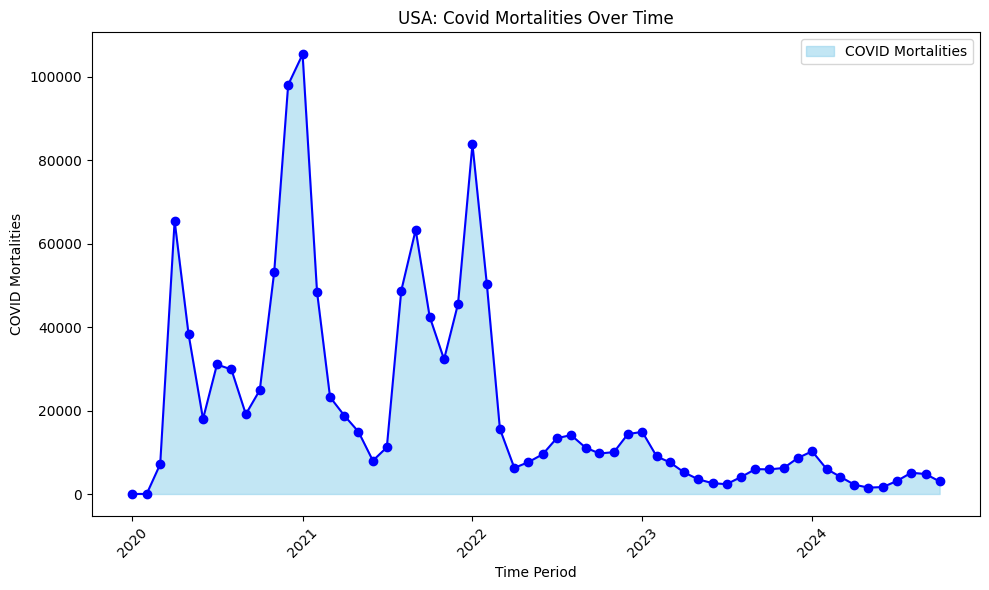

In [38]:
plot_covid_mortality_trend(time_frames_usa, mortality_numbers_usa, chart_type='area', title="USA: Covid Mortalities Over Time")

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_covid_mortality_trend_fixed_y(time_frames, mortality_numbers, chart_type='line', title='COVID Mortalities Over Time'):
    """
    Plots a line chart or area chart of COVID mortalities over time.

    Parameters:
    - time_frames: List of time periods in "MM-YYYY" format.
    - mortality_numbers: List of mortality numbers corresponding to each time period.
    - chart_type: Type of chart to plot ('line' or 'area'). Default is 'line'.
    - title: Title of the chart. Default is 'COVID Mortalities Over Time'.
    """
    # Convert time_frames to datetime format
    time_frames = pd.to_datetime(time_frames, format='%m-%Y')
    
    plt.figure(figsize=(10, 6))
    
    if chart_type == 'line':
        plt.plot(time_frames, mortality_numbers, marker='o', color='blue', label='COVID Mortalities')
    elif chart_type == 'area':
        plt.fill_between(time_frames, mortality_numbers, color='skyblue', alpha=0.5, label='COVID Mortalities')
        plt.plot(time_frames, mortality_numbers, marker='o', color='blue')

    plt.xlabel('Time Period')
    plt.ylabel('COVID Mortalities')
    plt.title(title)
    
    # Set the y-axis to range from 0 to 100,000 in steps of 10,000
    plt.yticks(range(0, 100001, 10000))
    
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig("figures/"+ title + ".png")
    plt.show()


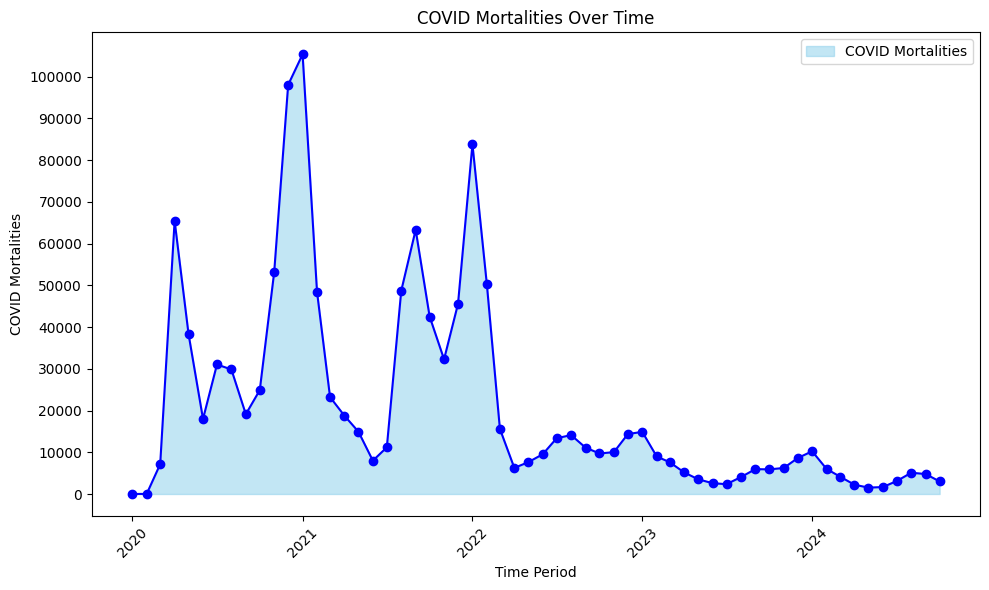

In [40]:
plot_covid_mortality_trend_fixed_y(time_frames_usa, mortality_numbers_usa, chart_type='area')

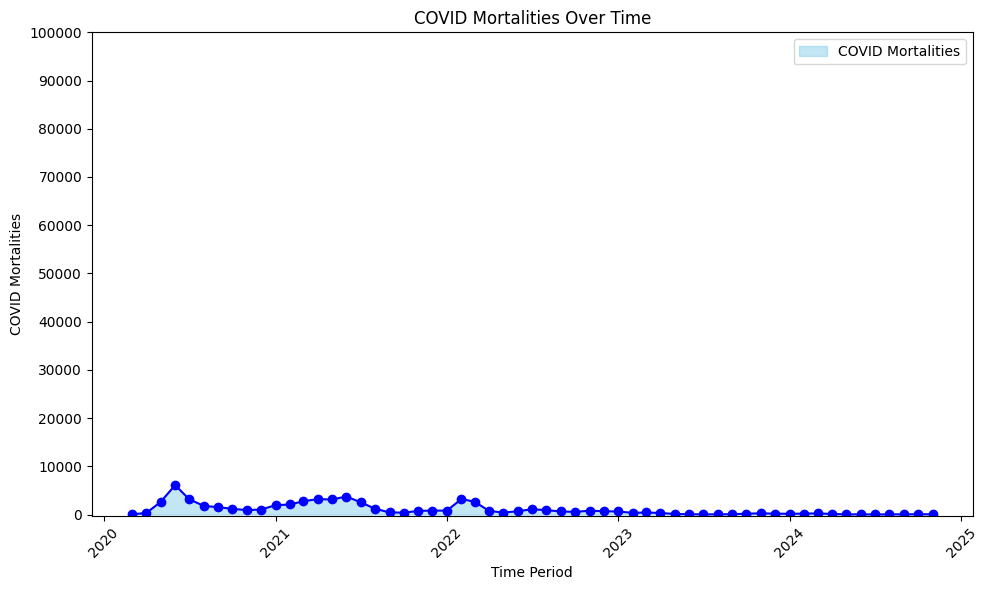

In [41]:
plot_covid_mortality_trend_fixed_y(time_frames_chile, mortality_numbers_chile, chart_type='area')

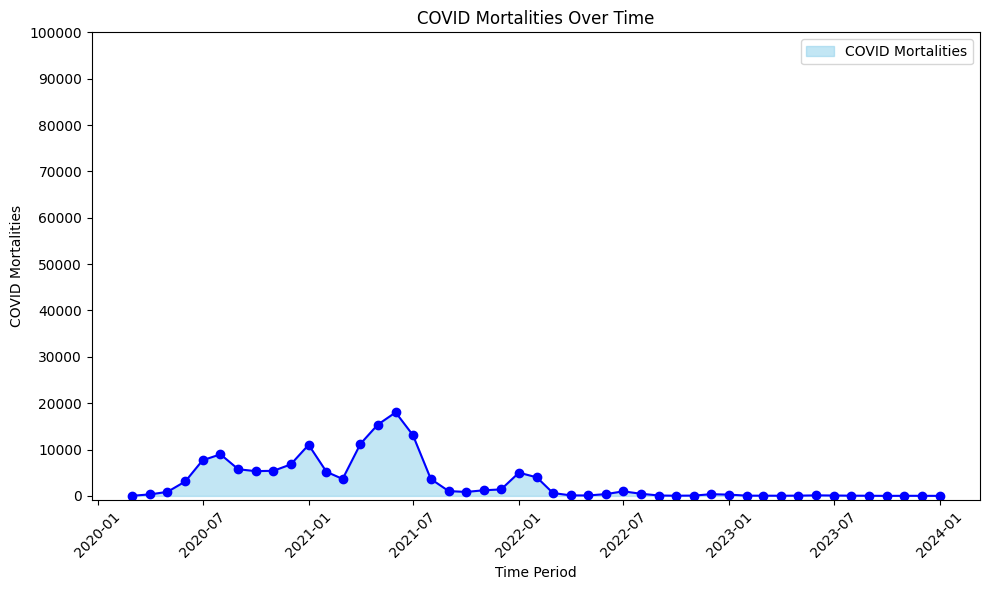

In [42]:
plot_covid_mortality_trend_fixed_y(time_frames_colombia, mortality_numbers_colombio, chart_type='area')

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_covid_mortality_trend_log(time_frames, mortality_numbers, chart_type='line', title='COVID Mortalities Over Time'):
    """
    Plots a line chart or area chart of COVID mortalities over time with a logarithmic y-axis.

    Parameters:
    - time_frames: List of time periods in "MM-YYYY" format.
    - mortality_numbers: List of mortality numbers corresponding to each time period.
    - chart_type: Type of chart to plot ('line' or 'area'). Default is 'line'.
    - title: Title of the chart. Default is 'COVID Mortalities Over Time'.
    """
    # Convert time_frames to datetime format
    time_frames = pd.to_datetime(time_frames, format='%m-%Y')
    
    plt.figure(figsize=(10, 6))
    
    if chart_type == 'line':
        plt.plot(time_frames, mortality_numbers, marker='o', color='blue', label='COVID Mortalities')
    elif chart_type == 'area':
        plt.fill_between(time_frames, mortality_numbers, color='skyblue', alpha=0.5, label='COVID Mortalities')
        plt.plot(time_frames, mortality_numbers, marker='o', color='blue')

    plt.xlabel('Time Period')
    plt.ylabel('COVID Mortalities')
    plt.title(title)
    
    # Set y-axis to logarithmic scale
    plt.yscale('log')
    
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


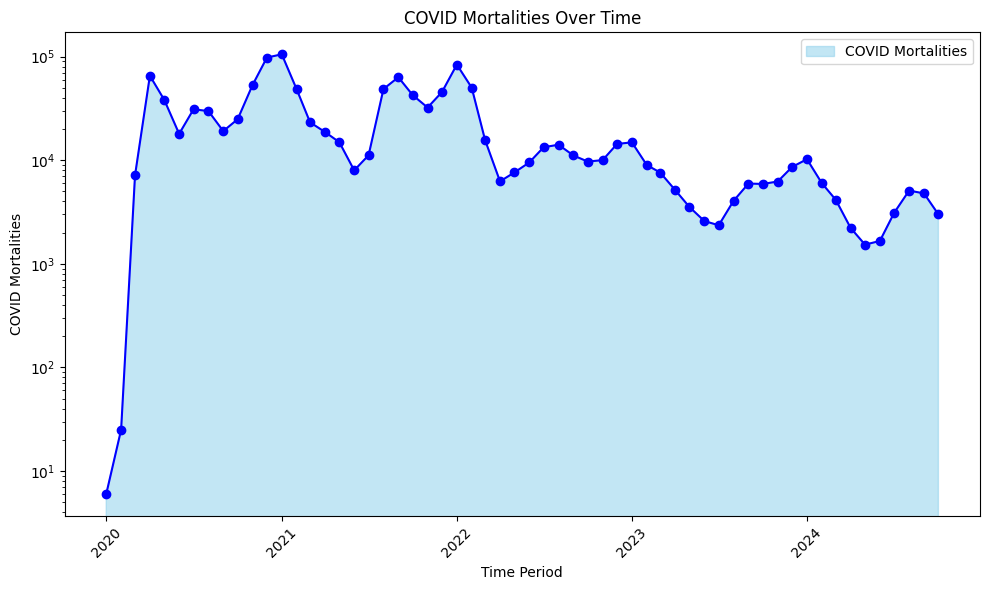

In [44]:
plot_covid_mortality_trend_log(time_frames_usa, mortality_numbers_usa, chart_type='area')

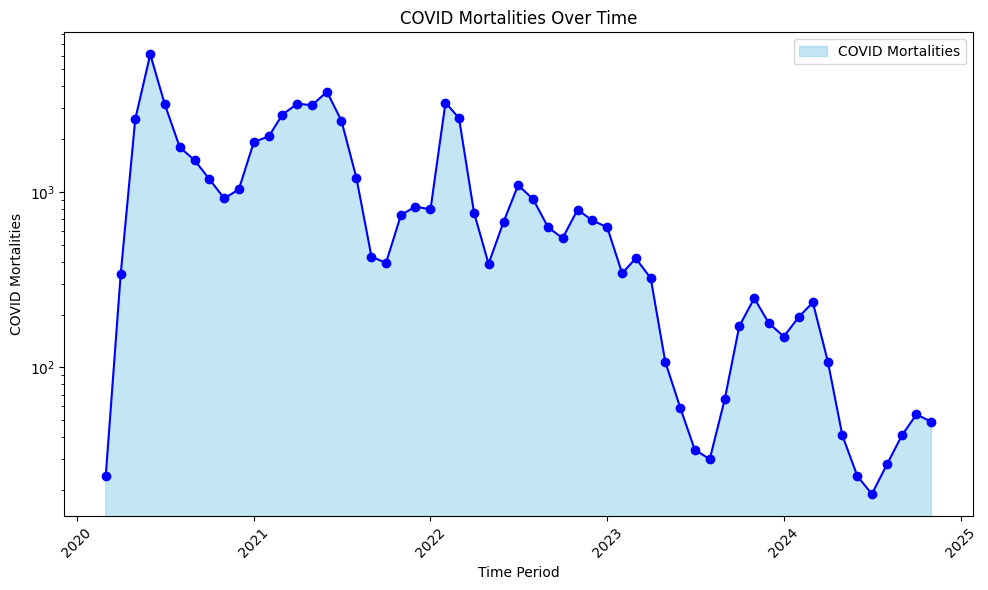

In [45]:
plot_covid_mortality_trend_log(time_frames_chile, mortality_numbers_chile, chart_type='area')

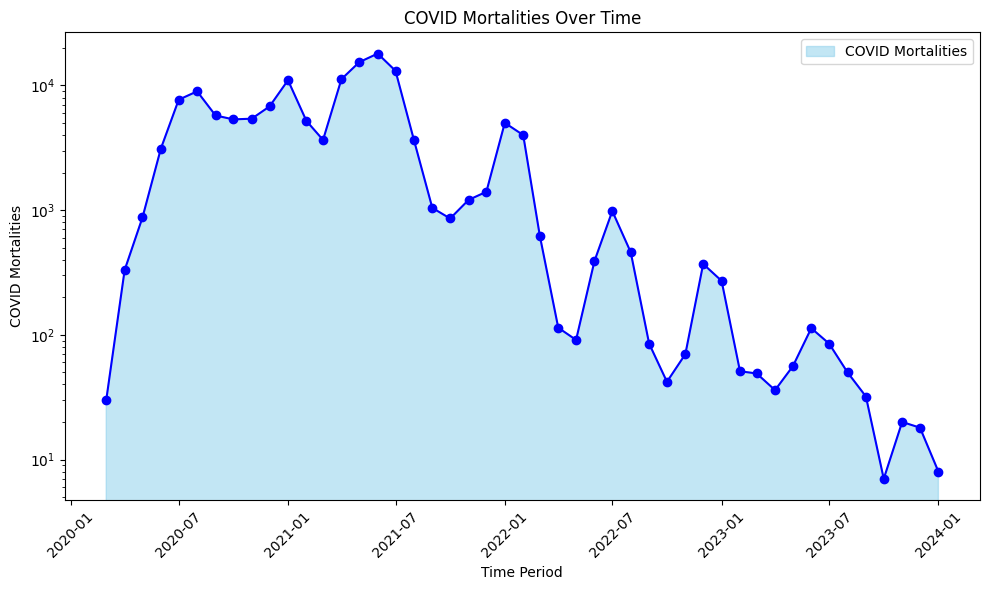

In [46]:
plot_covid_mortality_trend_log(time_frames_colombia, mortality_numbers_colombio, chart_type='area')

In [75]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_covid_mortality_trend_overlay(time_frames_list, mortality_numbers_list, country_names, chart_type='line', title='COVID Mortalities Over Time', is_relative=False):
    """
    Plots a line chart or area chart of COVID mortalities over time for multiple countries.

    Parameters:
    - time_frames_list: List of lists of time periods in "MM-YYYY" format for each country.
    - mortality_numbers_list: List of lists of mortality numbers corresponding to each time period for each country.
    - country_names: List of country names corresponding to each dataset.
    - chart_type: Type of chart to plot ('line' or 'area'). Default is 'line'.
    - title: Title of the chart. Default is 'COVID Mortalities Over Time'.
    """
    plt.figure(figsize=(10, 6))
    
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']  # Add more colors if needed
    for i, (time_frames, mortality_numbers, country_name) in enumerate(zip(time_frames_list, mortality_numbers_list, country_names)):
        time_frames = pd.to_datetime(time_frames, format='%m-%Y')
        
        if chart_type == 'line':
            plt.plot(time_frames, mortality_numbers, marker='o', color=colors[i % len(colors)], label=country_name)
        elif chart_type == 'area':
            plt.fill_between(time_frames, mortality_numbers, color=colors[i % len(colors)], alpha=0.5, label=country_name)
            plt.plot(time_frames, mortality_numbers, marker='o', color=colors[i % len(colors)])
    
    plt.xlabel('Time Period')
    if is_relative:
        plt.ylabel('COVID-19 Mortalities per 100k')
    else:
        plt.ylabel('COVID-19 Mortalities')
    #plt.title(title)
    
    # Set the y-axis to range from 0 to 100,000 in steps of 10,000
    #plt.yticks(range(0, 100001, 10000))
    #plt.yticks(range(0, 50001, 10000))
    
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    
    plt.savefig("figures/"+ title + ".png")
    plt.show()


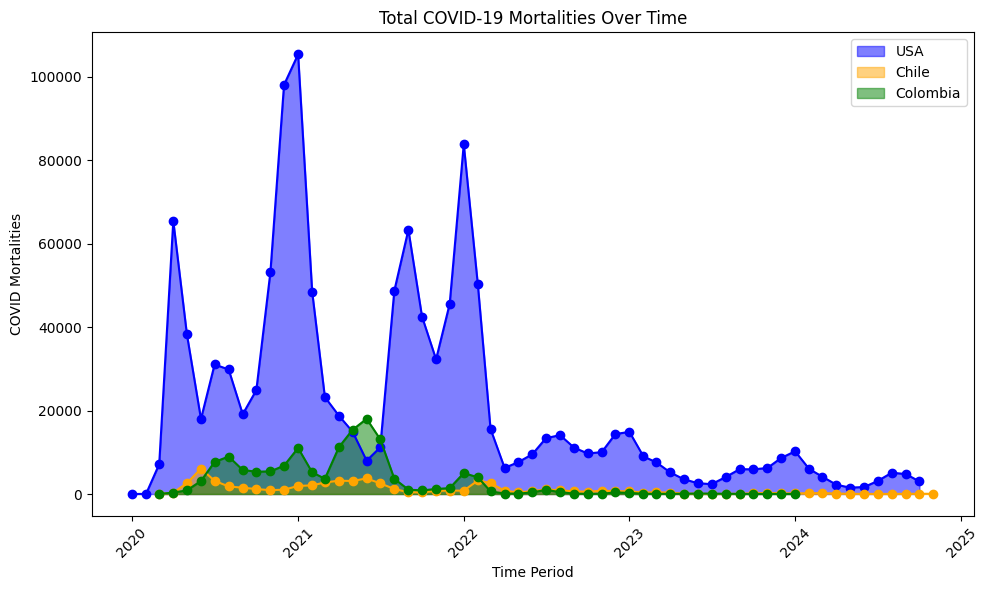

In [48]:
time_frames_list = [time_frames_usa, time_frames_chile, time_frames_colombia]
mortality_numbers_list = [mortality_numbers_usa, mortality_numbers_chile, mortality_numbers_colombio]
country_names = ['USA', 'Chile', 'Colombia']
plot_covid_mortality_trend_overlay(time_frames_list, mortality_numbers_list, country_names, chart_type='area', title="Total COVID-19 Mortalities Over Time")

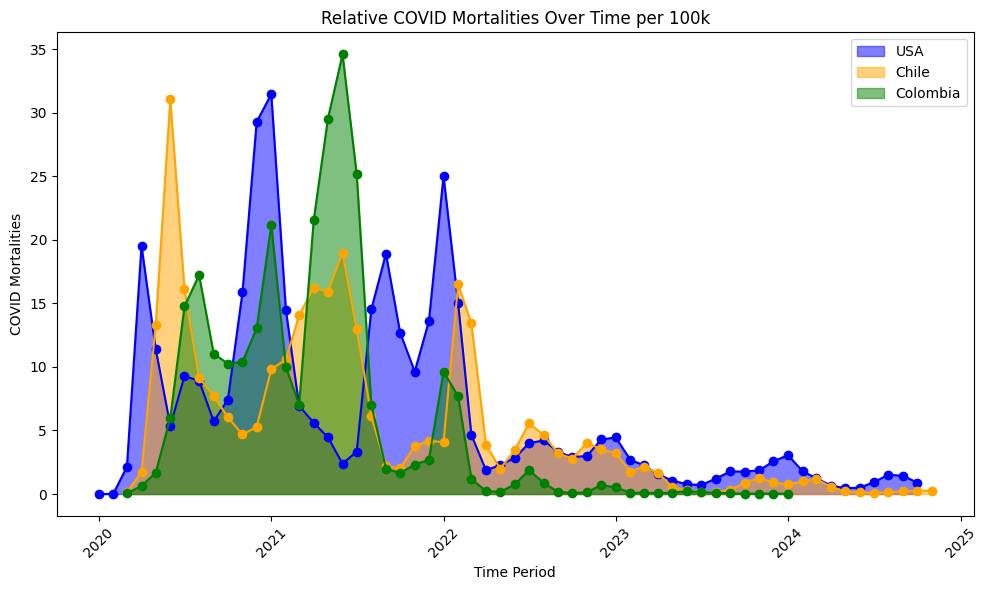

In [49]:
time_frames_colombia, relative_mortality_numbers_colombia = prepare_monthly_relative_mortality_data(colombia_df, date_column='Fecha de muerte', population_size=total_population[1])
timee_frames_chile, relative_mortality_numbers_chile = prepare_monthly_relative_mortality_data(chile_df, date_column='FECHA_DEF', population_size=total_population[0])
time_frames_usa, relative_mortality_numbers_usa = prepare_monthly_relative_mortality_from_period_usa(usa_df, population_size=total_population[2])

time_frames_list = [time_frames_usa, time_frames_chile, time_frames_colombia]
relative_mortality_numbers_list = [relative_mortality_numbers_usa, relative_mortality_numbers_chile, relative_mortality_numbers_colombia]
country_names = ['USA', 'Chile', 'Colombia']

# Multiply every value in relative_mortality_numbers_list by 100000 to get the values per 100k
relative_mortality_numbers_list = [[value * 100000 for value in values] for values in relative_mortality_numbers_list]

# TODO why are values here in range <35 when above they are in range <350

plot_covid_mortality_trend_overlay(time_frames_list, relative_mortality_numbers_list, country_names, chart_type='area', title="Relative COVID Mortalities Over Time per 100k")

## Question 3:

In [50]:
countries, relative_mortality_values_per_100k

(['Chile', 'Colombia', 'USA'],
 [np.float64(297.1992792513751),
  np.float64(274.7903203460916),
  np.float64(361.43838869871706)])

In [51]:
df_race_usa = usa_df[usa_df['group'] == "Race"]
    
subgroups = df_race["subgroup1"].unique()

sum = 0
for subgroup in subgroups:
    tmp = total_covid_deaths_by_col(df_race, "subgroup1", subgroup)
    print(f"{subgroup}: {tmp}")
    sum+=tmp
    
print(sum)

Hispanic: 175438.0
Non-Hispanic American Indian or Alaska Native: 12492.0
Non-Hispanic Asian: 37849.0
Non-Hispanic Black: 162968.0
Non-Hispanic Native Hawaiian or Other Pacific Islander: 2375.0
Non-Hispanic White: 811446.0
1202568.0


In [52]:
total_hispanic_deaths = total_covid_deaths_by_col(df_race, "subgroup1", "Hispanic")
print(total_hispanic_deaths)

175438.0


In [53]:
## TODO: Shit, what is the hispanic population in the US??
#-> Dont have dataset for that (may just sneakily avert mentioning in the report?
# Google: 65.2 million / 19.5%
hispanics_in_us = 0.195

In [54]:
# Re-executing this messes up the lists

# Create new lists for updated countries and mortality values
new_countries = countries.copy()
new_relative_mortality_values = []
new_relative_mortality_values_per_100k = []

# Calculate new values
hispanic_relative_mortality = total_hispanic_deaths / (total_population[2] * hispanics_in_us)
hispanic_relative_mortality_per_100k = hispanic_relative_mortality * 100000

# Extend the new lists with the existing and new values
new_countries.append("Hispanics in USA")
new_relative_mortality_values.extend(relative_mortality_values + [hispanic_relative_mortality])
new_relative_mortality_values_per_100k.extend(relative_mortality_values_per_100k + [hispanic_relative_mortality_per_100k])

# Now new_countries, new_relative_mortality_values, and new_relative_mortality_values_per_100k contain the updated values


In [55]:
new_countries

['Chile', 'Colombia', 'USA', 'Hispanics in USA']

In [56]:
new_relative_mortality_values

[np.float64(0.002971992792513751),
 np.float64(0.002747903203460916),
 np.float64(0.0036143838869871704),
 np.float64(0.002686300504138675)]

In [57]:
new_relative_mortality_values_per_100k

[np.float64(297.1992792513751),
 np.float64(274.7903203460916),
 np.float64(361.43838869871706),
 np.float64(268.6300504138675)]

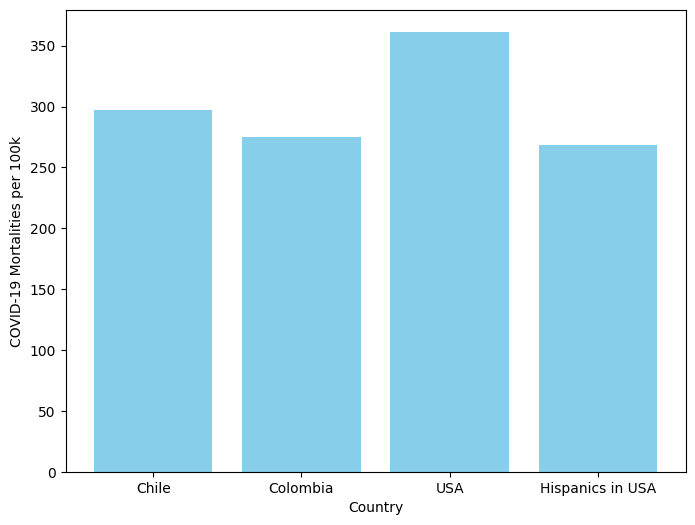

In [76]:
plot_covid_mortality(new_countries, new_relative_mortality_values_per_100k, title="Relative Covid-19 Mortality per 100k", is_relative=True)

In [59]:
def prepare_monthly_relative_mortality_from_period_usa_with_subgroup(df, start_col='data_period_start', mortality_col='covid_deaths', group_col='group', group_column='All', subgroup_col='subgroup1', subgroup_column="Hispanic", population_size=1):
    """
    Prepares two lists for plotting: one with the time periods and another with the summed relative mortality numbers.
    Handles filtering by group and subgroup, including the "All" group which sums across all groups.
    
    Parameters:
    - df: DataFrame with columns for the start date, death counts, and group information.
    - start_col: Column name for the start date of the period. Default is 'data_period_start'.
    - mortality_col: Column name for the number of deaths. Default is 'covid_deaths'.
    - group_col: Column name for the grouping column. Default is 'group'.
    - group_column: The specific group to filter by. Default is 'All' for total deaths across all groups.
    - subgroup_col: Column name for the sub-grouping column. Default is 'subgroup1'.
    - subgroup_column: The specific subgroup to filter by. Default is None to include all subgroups.
    - population_size: The population size to calculate relative mortality. Default is 1.
    
    Returns:
    - time_frames: List of time periods in "MM-YYYY" format.
    - relative_mortality_numbers: List of summed relative mortality values for each period.
    """
    # Ensure the date is in datetime format
    df[start_col] = pd.to_datetime(df[start_col])

    # Filter by the specified group
    df_filtered = df[df[group_col] == group_column]

    # Filter by the specified subgroup if provided
    if subgroup_column is not None:
        df_filtered = df_filtered[df_filtered[subgroup_col] == subgroup_column]

    # Group by the start date of each period (monthly) and sum the deaths
    df_grouped = df_filtered.groupby(df_filtered[start_col].dt.to_period('M'))[mortality_col].sum()
    
    # Prepare lists of time periods and summed relative mortality numbers
    time_frames = df_grouped.index.strftime('%m-%Y').tolist()
    relative_mortality_numbers = (df_grouped / population_size).tolist()
    
    return time_frames, relative_mortality_numbers


In [60]:
usa_df[usa_df["group"] == "Race"]

,data_period_start,data_period_end,group,subgroup1,covid_deaths,crude_rate
638,2020-01-01,2020-01-31,Race,Hispanic,1.0,0.00
639,2020-02-01,2020-02-29,Race,Hispanic,3.0,0.00
640,2020-03-01,2020-03-31,Race,Hispanic,1120.0,1.79
641,2020-04-01,2020-04-30,Race,Hispanic,11034.0,17.61
642,2020-05-01,2020-05-31,Race,Hispanic,6193.0,9.89
...,...,...,...,...,...,...
1039,2024-06-01,2024-06-30,Race,Non-Hispanic White,1279.0,0.65
1040,2024-07-01,2024-07-31,Race,Non-Hispanic White,2330.0,1.18
1041,2024-08-01,2024-08-31,Race,Non-Hispanic White,4003.0,2.03
1042,2024-09-01,2024-09-30,Race,Non-Hispanic White,3873.0,1.97


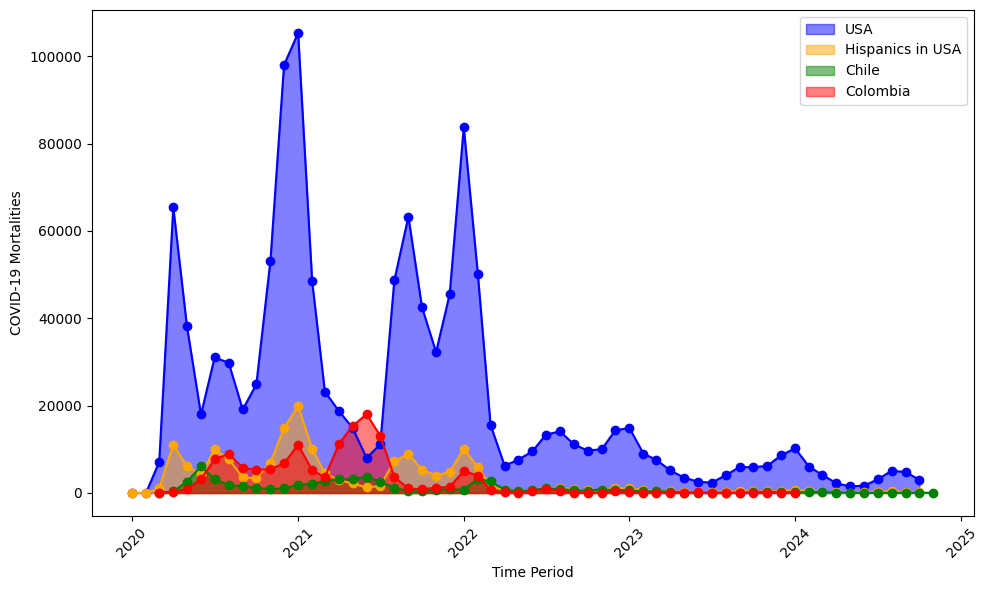

In [81]:
time_frames_hispanic, mortality_numbers_hispanic = prepare_monthly_mortality_from_period_usa_with_subgroup(usa_df, group_column="Race", subgroup_column="Hispanic")
time_frames_usa, mortality_numbers_usa = prepare_monthly_mortality_from_period_usa(usa_df)
time_frames_colombia, mortality_numbers_colombia = prepare_monthly_mortality_data(colombia_df, date_column='Fecha de muerte')
time_frames_chile, mortality_numbers_chile = prepare_monthly_mortality_data(chile_df, date_column='FECHA_DEF')

time_frames_list = [time_frames_usa, time_frames_hispanic, time_frames_chile, time_frames_colombia]
mortality_numbers_list = [mortality_numbers_usa, mortality_numbers_hispanic, mortality_numbers_chile, mortality_numbers_colombia]
country_names = ['USA', "Hispanics in USA", 'Chile', 'Colombia']

plot_covid_mortality_trend_overlay(time_frames_list, mortality_numbers_list, country_names, chart_type='area', title="Total COVID-19 Mortality Over Time")

In [62]:
time_frames_usa

['01-2020',
 '02-2020',
 '03-2020',
 '04-2020',
 '05-2020',
 '06-2020',
 '07-2020',
 '08-2020',
 '09-2020',
 '10-2020',
 '11-2020',
 '12-2020',
 '01-2021',
 '02-2021',
 '03-2021',
 '04-2021',
 '05-2021',
 '06-2021',
 '07-2021',
 '08-2021',
 '09-2021',
 '10-2021',
 '11-2021',
 '12-2021',
 '01-2022',
 '02-2022',
 '03-2022',
 '04-2022',
 '05-2022',
 '06-2022',
 '07-2022',
 '08-2022',
 '09-2022',
 '10-2022',
 '11-2022',
 '12-2022',
 '01-2023',
 '02-2023',
 '03-2023',
 '04-2023',
 '05-2023',
 '06-2023',
 '07-2023',
 '08-2023',
 '09-2023',
 '10-2023',
 '11-2023',
 '12-2023',
 '01-2024',
 '02-2024',
 '03-2024',
 '04-2024',
 '05-2024',
 '06-2024',
 '07-2024',
 '08-2024',
 '09-2024',
 '10-2024']

In [63]:
a, b = prepare_monthly_relative_mortality_from_period_usa_with_subgroup(usa_df)

In [64]:
a

[]

In [65]:
usa_df

,data_period_start,data_period_end,group,subgroup1,covid_deaths,crude_rate
0,2020-01-01,2020-01-31,Age,0-4 years,0.0,0.00
1,2020-02-01,2020-02-29,Age,0-4 years,0.0,0.00
2,2020-03-01,2020-03-31,Age,0-4 years,4.0,0.02
3,2020-04-01,2020-04-30,Age,0-4 years,5.0,0.03
4,2020-05-01,2020-05-31,Age,0-4 years,7.0,0.04
...,...,...,...,...,...,...
5293,2024-06-01,2024-06-30,Age and Race,75+ years,970.0,5.69
5294,2024-07-01,2024-07-31,Age and Race,75+ years,1736.0,10.19
5295,2024-08-01,2024-08-31,Age and Race,75+ years,3053.0,17.92
5296,2024-09-01,2024-09-30,Age and Race,75+ years,2923.0,17.16


In [78]:
time_frames_hispanic, relative_mortality_numbers_hispanic = prepare_monthly_relative_mortality_from_period_usa_with_subgroup(usa_df, group_column="Race", subgroup_column="Hispanic" ,population_size=total_population[2] * hispanics_in_us)
time_frames_colombia, relative_mortality_numbers_colombia = prepare_monthly_relative_mortality_data(colombia_df, date_column='Fecha de muerte', population_size=total_population[1])
timee_frames_chile, relative_mortality_numbers_chile = prepare_monthly_relative_mortality_data(chile_df, date_column='FECHA_DEF', population_size=total_population[0])
time_frames_usa, relative_mortality_numbers_usa = prepare_monthly_relative_mortality_from_period_usa(usa_df, population_size=total_population[2])

time_frames_list = [time_frames_usa, time_frames_hispanic, time_frames_chile, time_frames_colombia]
relative_mortality_numbers_list = [relative_mortality_numbers_usa, relative_mortality_numbers_hispanic, relative_mortality_numbers_chile, relative_mortality_numbers_colombia]
country_names = ['USA', "Hispanics in USA", 'Chile', 'Colombia']

# Multiply every value in relative_mortality_numbers_list by 100000 to get the values per 100k
relative_mortality_numbers_list = [[value * 1000000 for value in values] for values in relative_mortality_numbers_list]

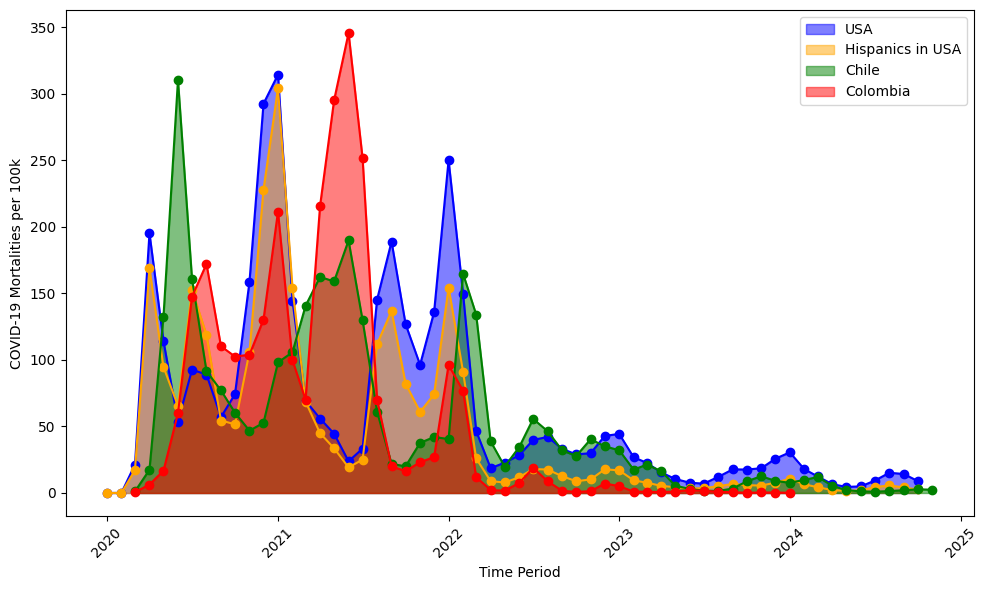

In [79]:
# Plot above data
plot_covid_mortality_trend_overlay(time_frames_list, relative_mortality_numbers_list, country_names, chart_type='area', title="Relative COVID-19 Mortality Over Time per 100k", is_relative=True)

In [68]:
# TODO => Conclusion: absolute/relative terms match more closely to hispanic countries, whereas temporal development matches general US population better

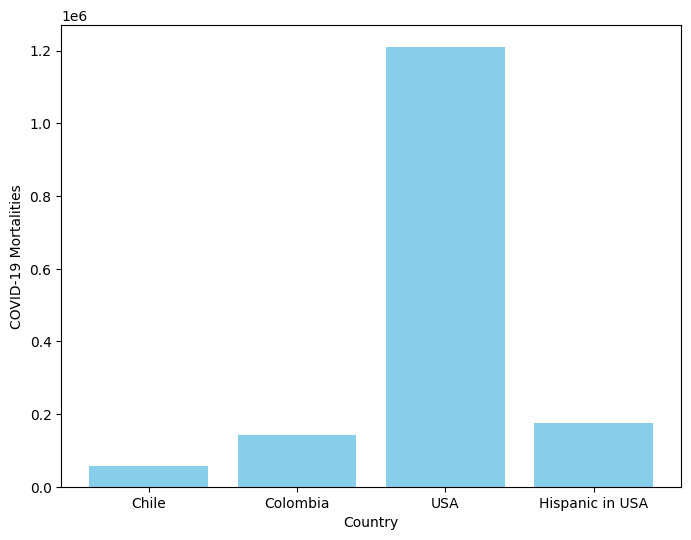

In [80]:
countries = ["Chile", "Colombia", "USA", "Hispanic in USA"]
total_hispanic_deaths = total_covid_deaths_by_col(df_race, "subgroup1", "Hispanic")
mortality_values = [chile_df.shape[0], colombia_df.shape[0], total_covid_deaths_by_col(usa_df, col="group", group_column="All"), total_hispanic_deaths]


plot_covid_mortality(countries, mortality_values, title="Total COVID-19 Mortality")

In [70]:
# All unique subgroup1 values where group is "Race" and 
usa_df[usa_df["group"] == "Race"]["subgroup1"].unique()

array(['Hispanic', 'Non-Hispanic American Indian or Alaska Native',
       'Non-Hispanic Asian', 'Non-Hispanic Black',
       'Non-Hispanic Native Hawaiian or Other Pacific Islander',
       'Non-Hispanic White'], dtype=object)

In [71]:
native_americans_in_us = 0.02
asians_in_us = 0.072
black_in_us = 0.135
pacific_islanders_in_us = 0.005
white_in_us = 0.75

ethnicity_keys = ['Hispanic', 'Non-Hispanic American Indian or Alaska Native',
       'Non-Hispanic Asian', 'Non-Hispanic Black',
       'Non-Hispanic Native Hawaiian or Other Pacific Islander',
       'Non-Hispanic White']

# sum and print above values
sum = 0
sum += native_americans_in_us
sum += asians_in_us
sum += black_in_us
sum += pacific_islanders_in_us
sum += white_in_us
print(sum)

0.982


In [72]:
# Relative mortality values of us ethnicities
time_frames_native_americans, relative_mortality_numbers_native_americans = prepare_monthly_relative_mortality_from_period_usa_with_subgroup(usa_df, group_column="Race", subgroup_column=ethnicity_keys[1], population_size=total_population[2] * native_americans_in_us)
time_frames_asians, relative_mortality_numbers_asians = prepare_monthly_relative_mortality_from_period_usa_with_subgroup(usa_df, group_column="Race", subgroup_column=ethnicity_keys[2], population_size=total_population[2] * asians_in_us)
time_frames_black, relative_mortality_numbers_black = prepare_monthly_relative_mortality_from_period_usa_with_subgroup(usa_df, group_column="Race", subgroup_column=ethnicity_keys[3], population_size=total_population[2] * black_in_us)
time_frames_pacific_islanders, relative_mortality_numbers_pacific_islanders = prepare_monthly_relative_mortality_from_period_usa_with_subgroup(usa_df, group_column="Race", subgroup_column=ethnicity_keys[4], population_size=total_population[2] * pacific_islanders_in_us)
time_frames_white, relative_mortality_numbers_white = prepare_monthly_relative_mortality_from_period_usa_with_subgroup(usa_df, group_column="Race", subgroup_column=ethnicity_keys[5], population_size=total_population[2] * white_in_us)


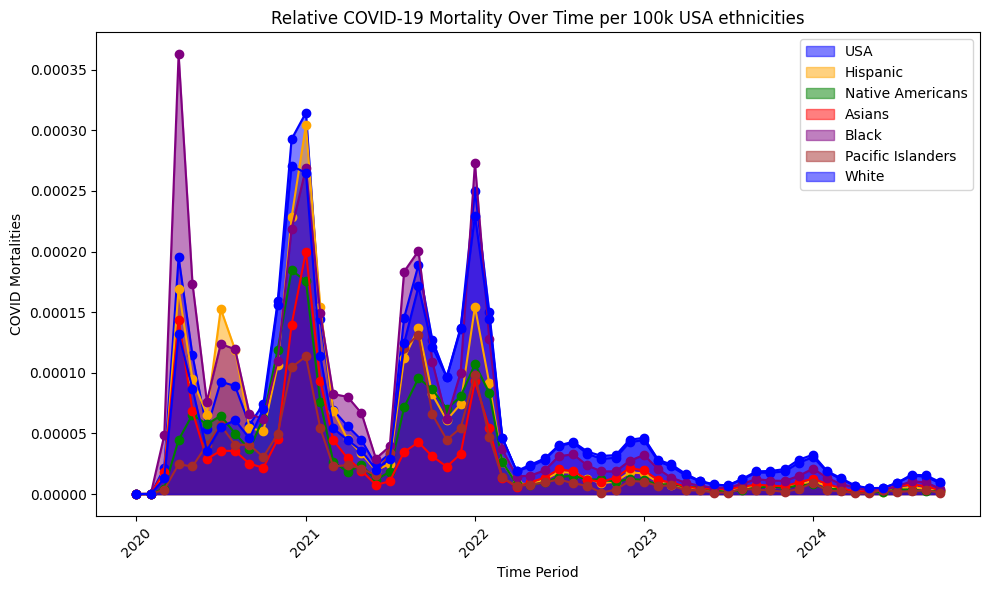

In [73]:
# TODO this is based on bad estimates of population percentages

plot_covid_mortality_trend_overlay([time_frames_usa, time_frames_hispanic,time_frames_native_americans, time_frames_asians, time_frames_black, time_frames_pacific_islanders, time_frames_white], [relative_mortality_numbers_usa, relative_mortality_numbers_hispanic, relative_mortality_numbers_native_americans, relative_mortality_numbers_asians, relative_mortality_numbers_black, relative_mortality_numbers_pacific_islanders, relative_mortality_numbers_white], ['USA', 'Hispanic', 'Native Americans', 'Asians', 'Black', 'Pacific Islanders', 'White'], chart_type='area', title="Relative COVID-19 Mortality Over Time per 100k USA ethnicities")